In [11]:
# Install the required packages
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [12]:
# Import necessary libraries
import gym
import random
import imageio
import numpy as np
from tqdm import trange
from IPython.display import Image

In [13]:
def initialize_q_table(env):
    """
    สร้าง Q-table ที่มีขนาดเท่ากับ (จำนวนสถานะ, จำนวน action)
    """
    return np.zeros((env.observation_space.n, env.action_space.n))

In [14]:
def select_action(env, q_table, state, epsilon): # epsilon_greedy_policy
    """
    สร้าง action จาก Q-table โดยมีความน่าจะเป็น epsilon ที่จะสุ่ม action และ (1 - epsilon) ที่จะเลือก action ที่มีค่า Q-value มากที่สุด
    """
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample() # Explore action space
    else:
        return np.argmax(q_table[state]) # Exploit learned values

In [15]:
def update_q_table(q_table, state, action, reward, next_state, alpha, gamma):
    """
    อัพเดทค่า Q-value ตามสมการ Bellman
    """
    q_table[state, action] = q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

In [16]:
def train(env, q_table, num_episodes, max_steps, alpha, gamma, epsilon):
    """
    ฝึก Q-table โดยใช้วิธี Q-learning และใช้ epsilon-greedy policy เพื่อสร้าง action จากนั้นอัพเดทค่า Q-value ตามสมการ Bellman
    """
    for episode in trange(num_episodes):
        state = env.reset()
        for step in range(max_steps):
            action = select_action(env, q_table, state, epsilon)
            next_state, reward, done, _ = env.step(action)
            update_q_table(q_table, state, action, reward, next_state, alpha, gamma)
            state = next_state
            if done:
                break
    return q_table

In [17]:
def evaluate_agent(env, q_table, num_episodes, max_steps):
    """
    ทดสอบความสามารถของ agent โดยใช้ Q-table ที่ได้จากการฝึก
    """
    frames = []
    for episode in range(num_episodes):
        state = env.reset()
        for step in range(max_steps):
            action = np.argmax(q_table[state])
            state, _, done, _ = env.step(action)
            frames.append(env.render(mode='rgb_array'))
            if done:
                break
    return frames

In [18]:
env = gym.make('FrozenLake-v1', map_name='4x4', is_slippery=False)
state_space = env.observation_space.n
action_space = env.action_space.n

# Training parameters
num_episodes = 10000

# Evaluation parameters
num_eval_episodes = 100

# Environment parameters
max_steps = 99 # step มีไว้เพื่อป้องกันการวนลูปไปเรื่อยๆ
discount_rate = 0.95 # gamma
learning_rate = 0.8 # alpha
eval_seed = [] # ใช้สำหรับเก็บผลลัพธ์ของการทดสอบโดยใช้ seed ที่แตกต่างกัน

# Exploration parameters
max_epsilon = 1.0
min_epsilon = 0.05 # เพื่อป้องกันการสุ่ม action ที่มีความน่าจะเป็นมากเกินไป
decay_rate = 0.0005 # ค่าที่ใช้ในการลดความน่าจะเป็นของการสุ่ม action

In [19]:
# Initialize Q-table
q_table = initialize_q_table(env)

# Training
q_table = train(env, q_table, num_episodes, max_steps, learning_rate, discount_rate, max_epsilon)

# Show Q-table
print(f"Q-table:\n{q_table}")

# Evaluation
frames = evaluate_agent(env, q_table, num_eval_episodes, max_steps)

100%|██████████| 10000/10000 [00:00<00:00, 15211.59it/s]


Q-table:
[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


In [20]:
# Initialize Q-table
q_table = initialize_q_table(env)

# Training
q_table = train(env, q_table, num_episodes, max_steps, learning_rate, discount_rate, max_epsilon)

# Evaluation
frames = evaluate_agent(env, q_table, num_eval_episodes, max_steps)

100%|██████████| 10000/10000 [00:00<00:00, 13712.28it/s]


Q-table:
[[0.73509189 0.77378094 0.77378094 0.73509189]
 [0.73509189 0.         0.81450625 0.77378094]
 [0.77378094 0.857375   0.77378094 0.81450625]
 [0.81450625 0.         0.77378094 0.77378094]
 [0.77378094 0.81450625 0.         0.73509189]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.         0.81450625]
 [0.         0.         0.         0.        ]
 [0.81450625 0.         0.857375   0.77378094]
 [0.81450625 0.9025     0.9025     0.        ]
 [0.857375   0.95       0.         0.857375  ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9025     0.95       0.857375  ]
 [0.9025     0.95       1.         0.9025    ]
 [0.         0.         0.         0.        ]]


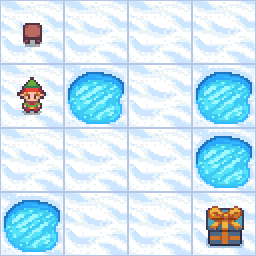

In [21]:
# Show Q-table
print(f"Q-table:\n{q_table}")

# Save gif
imageio.mimsave('frozen_lake.gif', frames, duration=720)

# Show Evaluation with gif
Image('./frozen_lake.gif')